In [1]:
import time
import os
import h5py
import math
from pprint import pprint

import scipy.io 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.utils import np_utils

In [2]:
##-----------------------------------------------------------------------------
## Load Testing data
##-----------------------------------------------------------------------------
AtomIntensity = h5py.File('data/dAtomIntensity_TestData_New.mat', 'r')
TestIntensity = np.array(AtomIntensity.get('dAtomIntensity_TestData_New'))

x_test = TestIntensity
print("x_test.shape={}".format(x_test.shape))
x_test = x_test.reshape(-1, x_test.shape[1], x_test.shape[2], x_test.shape[3], 1)
print("x_test.shape={}".format(x_test.shape))
#y_train = TestIntensity
#print("y_train.shape={}".format(y_train.shape))

##-----------------------------------------------------------------------------
## Normalize Testing set (z-score : (x-x.mean)/x.std)
##-----------------------------------------------------------------------------

#y_train_Norm = np.zeros((y_train.shape[0], y_train.shape[1], y_train.shape[2], y_train.shape[2]))
#for iNum_Atom in range(y_train.shape[0]):
#    y_train_Norm[iNum_Atom,:,:,:] = (y_train[iNum_Atom,:,:,:] - y_train[iNum_Atom,:,:,:].mean() )/ y_train[iNum_Atom,:,:,:].std()
#print("y_train_Norm.shape={}".format(y_train_Norm.shape)) 


##-----------------------------------------------------------------------------
## Reshape Training set & x_label ---> one hot
##-----------------------------------------------------------------------------
#y_train_NR = y_train_Norm.reshape(y_train.shape[0], y_train.shape[1], y_train.shape[2], y_train.shape[2], 1)

x_test.shape=(23804, 7, 7, 7)
x_test.shape=(23804, 7, 7, 7, 1)


In [5]:
from keras.models import load_model
from keras import backend as K

tic = time.time()

prediction_result = []

#-------------load model
#model = load_model('model/my_CNNmodel.h5')
model = load_model('my_CNNmodel')
print("The model is restored suscessfully!") 
    
prediction_cluster = np.argmax(model.predict(x_test), axis=-1)
#model.predict_classes() is deprecated and will be removed after 2021-01-01.
#prediction_cluster = model.predict_classes(x_test)
#prediction_cluster = model.predict_classes(y_train_NR)

scores = model.evaluate(x_test)
print('accuracy=', scores[1])

#-------------save
scipy.io.savemat('prediction_cluster.mat', {'prediction_cluster':prediction_cluster})
    
print(prediction_cluster)
print("The prediction is completed suscessfully!") 

toc = time.time()
print("Time=" + str((toc-tic)) + "sec")
print("----------------------------------------------------------------")


The model is restored suscessfully!
744/744 [==============================] - 2s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
accuracy= 0.0
[1 1 1 ... 0 0 0]
The prediction is completed suscessfully!
Time=12.672979831695557sec
----------------------------------------------------------------


# TestData

1. x
2. y
3. z
4. Intensity
5. order
6. original type
7. note

In [6]:
rawdata = scipy.io.loadmat("data/TestData")
print(type(rawdata))
print(list(rawdata.keys()))
particle = np.array(rawdata['TestData'])
print(particle.shape)
pprint(particle[:,0])

<class 'dict'>
['__header__', '__version__', '__globals__', 'TestData']
(7, 23804)
array([129.        ,  43.        ,  98.        ,   2.06193121,
         1.        ,   2.        ,   2.        ])


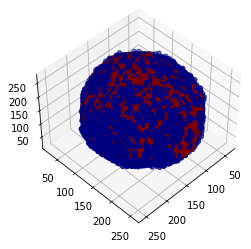

In [7]:
from mpl_toolkits.mplot3d import Axes3D
fig1 = plt.figure()
ax = plt.axes(projection='3d')

x = particle[0,:]
y = particle[1,:]
z = particle[2,:]
c = prediction_cluster
ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(45, 45)